<center><img src="https://github.com/insaid2018/Term-1/blob/master/Images/INSAID_Full%20Logo.png?raw=true" width="360" height="160" /></center>

# <center>Advanced RNN Architectures</center>

## Table of Contents

1. [Stacking Recurrent Layers](#section1)
  - 1.1 [Training and Evaluating a Stacked GRU Model](#section101)<br><br>
2. [Bidirectional RNNs](#section2)
  - 2.1 [Training and Evaluating a Bidirectional LSTM](#section201)<br><br>
  - 2.2 [Training and Evaluating a Bidirectional GRU](#section202)<br><br>
  - 2.3 [Comparing the Bidirectional LSTM and GRU Models](#section203)<br><br>
3. [Going Even Further](#section3)

<a id=section1></a>
## 1. Stacking Recurrent Layers

- When you’re no longer overfitting but seem to have hit a **performance bottleneck**, you should consider **increasing** the **capacity** of the network.

<br> 
<center><img src="https://raw.githubusercontent.com/insaid2018/DeepLearning/master/images/bottleneck1.jpg"/></center>
<br> 

- The universal machine-learning workflow: it’s generally a good idea to **increase** the **capacity** of your network **until overfitting** becomes the primary obstacle.
  - Assuming you’re already taking basic steps to **mitigate overfitting**, such as using **dropout**). 

<br> 
<center><img src="https://raw.githubusercontent.com/insaid2018/DeepLearning/master/images/bottleneck2.png"/></center>

<br> 
- As long as you **aren’t overfitting** too badly, you’re likely **under capacity**.

<br> 
<center><img src="https://raw.githubusercontent.com/insaid2018/DeepLearning/master/images/overfitting1.jpg"/></center>

---

- **Increasing network capacity** is typically done by:
  
  - **Increasing** the *number of units* in the *layers*.
 
  - **Adding** more *layers*. 

<br> 
- **Recurrent layer stacking** is a classic way to build more-powerful recurrent networks.


- For instance, what currently powers the **Google Translate algorithm** is a stack of **seven** large LSTM layers - that’s huge.

<br> 
<center><img src="https://raw.githubusercontent.com/insaid2018/DeepLearning/master/images/stacked_lstm.png"/></center>
<br>

- To **stack recurrent layers** on top of each other in Keras:
 
  - All *intermediate layers* should **return** their *full sequence of outputs* (a 3D tensor) rather than their *output at the last timestep*. 


- This is done by specifying **return_sequences=True**.

<a id=section101></a>
### 1.1 Training and Evaluating a Stacked GRU Model

In [ ]:
# Checking whether GPU is available or not, to be used with tensorflow.
import tensorflow as tf 
device_name = tf.test.gpu_device_name() 
if device_name != '/device:GPU:0': raise SystemError('GPU device not found') 
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing import sequence

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [ ]:
max_features = 10000
maxlen = 500

- **Loading the dataset**.

In [ ]:
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=max_features)

In [ ]:
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')

25000 train sequences
25000 test sequences


- **Padding the data**.

In [ ]:
x_train = sequence.pad_sequences(x_train, maxlen=maxlen)
x_test = sequence.pad_sequences(x_test, maxlen=maxlen)

In [ ]:
print('input_train shape:', x_train.shape)
print('input_test shape:', x_test.shape)

input_train shape: (25000, 500)
input_test shape: (25000, 500)


- **Building the model**.

In [ ]:
model = Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.GRU(32, return_sequences=True))
model.add(layers.GRU(64))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
gru_2 (GRU)                  (None, None, 32)          6240      
_________________________________________________________________
gru_3 (GRU)                  (None, 64)                18624     
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 344,929
Trainable params: 344,929
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compiling the model.
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

- **Training the model**.

In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 248s 12ms/sample - loss: 0.5064 - acc: 0.7351 - val_loss: 0.3776 - val_acc: 0.8432
Epoch 2/10
20000/20000 [==============================] - 251s 13ms/sample - loss: 0.2612 - acc: 0.8981 - val_loss: 0.3430 - val_acc: 0.8532
Epoch 3/10
20000/20000 [==============================] - 252s 13ms/sample - loss: 0.1888 - acc: 0.9302 - val_loss: 0.3380 - val_acc: 0.8692
Epoch 4/10
20000/20000 [==============================] - 247s 12ms/sample - loss: 0.1485 - acc: 0.9475 - val_loss: 0.3876 - val_acc: 0.8496
Epoch 5/10
20000/20000 [==============================] - 251s 13ms/sample - loss: 0.1207 - acc: 0.9577 - val_loss: 0.3949 - val_acc: 0.8684
Epoch 6/10
20000/20000 [==============================] - 248s 12ms/sample - loss: 0.0892 - acc: 0.9710 - val_loss: 0.4482 - val_acc: 0.8546
Epoch 7/10
20000/20000 [==============================] - 248s 12ms/sample - loss: 0.0762 - acc: 0.9739 -

**Visualizing Accuracy and Loss against Epochs**

In [ ]:
# Importing matplotlib for visualizations.
import matplotlib.pyplot as plt
%matplotlib inline

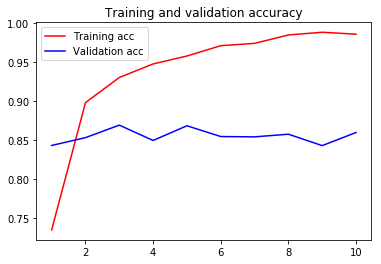

In [ ]:
# Plotting training and validation accuracy against epochs.
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

- We are getting the **best validation accuracy** of **86.92%** in the **3rd epoch** and the model starts overfitting after that.

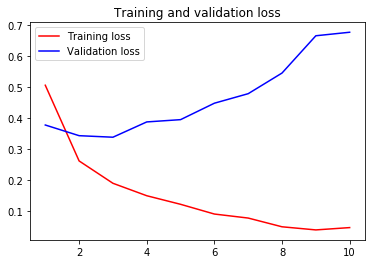

In [ ]:
# Plotting training and validation loss against epochs.
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

- We are getting the **best validation loss** of **0.3380** in the **3rd epoch** and the model starts overfitting after that.

In [ ]:
# Create a "weights" directory if not already present.
!mkdir weights

In [ ]:
# Saving model weights
model.save('weights/stacked.h5')

- You will see that the **added layer** does **improve** the **results** a bit, though not significantly. 


- You can draw two **conclusions**:
<br><br> 
  - If you’re still **not overfitting** too badly, you could safely **increase** the *size of your layers* in a quest for *validation-loss improvement*. This has a *non-negligible computational cost*, though.
<br><br>   
  - **Adding** a **layer didn’t help** by a *significant factor*, so you may be *seeing diminishing returns from increasing network capacity* at this point.

<a id=section2></a>
## 2. Bidirectional RNNs

- A *bidirectional RNN* is a common RNN variant that can offer **greater performance** than a regular RNN on certain tasks. 


- It’s **frequently used** in *natural-language processing* - you could call it the *Swiss Army Knife of Deep Learning for Natural Language Processing*.

---
<br> 
- RNNs are notably **order dependent**, or **time dependent**: 
  - They process the **timesteps** of their input sequences **in order**.
<br><br>
  - **Shuffling** or **reversing** the timesteps can completely change the *representations* the *RNN extracts* from the sequence. 
<br><br>
  - This is precisely the reason they **perform well** on *problems where order* is **meaningful**, such as the *temperature-forecasting problem*. 

<br> 
<center><img src="https://raw.githubusercontent.com/insaid2018/DeepLearning/master/images/temp_forecasting.jpg"/></center>
<br> 

---

- A *bidirectional RNN exploits* the **order sensitivity of RNNs**: 

  - It consists of using *two regular RNNs*, such as the GRU and LSTM layers, each of which processes the *input sequence in one direction* (**chronologically** and **antichronologically**)
<br><br>
  - Then merging their **representations**. 
<br><br>
  - By processing a **sequence both ways**, a *bidirectional RNN* can **catch patterns** that may be **overlooked** by a *unidirectional RNN*.
  
<br> 
<center><img src="https://raw.githubusercontent.com/insaid2018/DeepLearning/master/images/bidirectional_rnn.png"/></center>
<br> 

---

- On some text datasets, **reversed-order processing** works just as well as **chronological processing**, confirming the hypothesis that:

  *Although word order does matter in understanding language, which order you use isn’t crucial*. 

<br> 
<center><img src="https://raw.githubusercontent.com/insaid2018/DeepLearning/master/images/yoda_meme1.jpeg"/></center>

- Importantly, an RNN trained on **reversed sequences** will *learn different representations* than one trained on the original sequences.
  
  Much as you would have different mental models **if time flowed backward** in the real world: 
  
  *If you lived a life where you died on your first day and were born on your last day*. 

---

- A *bidirectional RNN* exploits this idea to **improve** on the **performance** of *chronologicalorder RNNs*. 


- It looks at its **input sequence both ways**, *obtaining potentially richer representations* and *capturing patterns* that may have been *missed by the chronological-order version* alone.

<br> 
<center><img src="https://raw.githubusercontent.com/insaid2018/DeepLearning/master/images/bidirectional_lstm.png"/></center>

- To **instantiate** a *bidirectional RNN* in **Keras**, you use the **Bidirectional** layer, which takes as its *first argument a recurrent layer instance*. 


- **Bidirectional** creates a second, separate instance of this recurrent layer.
  
  - Uses one instance for processing the input sequences in **chronological order**.
  
  - The other instance for processing the input sequences in **reversed order**. 

<br> 
<center><img src="https://raw.githubusercontent.com/insaid2018/DeepLearning/master/images/bidirectional_rnn1.png"/></center>

<br> 
- Let’s try it on the *IMDB Sentiment-Analysis Task*.

<a id=section201></a>
### 2.1 Training and Evaluating a Bidirectional LSTM

- **Building the model**.

In [ ]:
model = Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.Bidirectional(layers.LSTM(32)))
model.add(layers.Dense(1, activation='sigmoid'))

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
bidirectional (Bidirectional (None, 64)                16640     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 336,705
Trainable params: 336,705
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compiling the model.
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

- **Training the model**.

In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 307s 15ms/sample - loss: 0.5464 - acc: 0.7103 - val_loss: 0.3622 - val_acc: 0.8504
Epoch 2/10
20000/20000 [==============================] - 308s 15ms/sample - loss: 0.2735 - acc: 0.8925 - val_loss: 0.3100 - val_acc: 0.8706
Epoch 3/10
20000/20000 [==============================] - 312s 16ms/sample - loss: 0.1984 - acc: 0.9288 - val_loss: 0.2970 - val_acc: 0.8828
Epoch 4/10
20000/20000 [==============================] - 309s 15ms/sample - loss: 0.1489 - acc: 0.9506 - val_loss: 0.3882 - val_acc: 0.8704
Epoch 5/10
20000/20000 [==============================] - 309s 15ms/sample - loss: 0.1196 - acc: 0.9606 - val_loss: 0.3606 - val_acc: 0.8778
Epoch 6/10
20000/20000 [==============================] - 307s 15ms/sample - loss: 0.1080 - acc: 0.9650 - val_loss: 0.3927 - val_acc: 0.8680
Epoch 7/10
20000/20000 [==============================] - 307s 15ms/sample - loss: 0.0762 - acc: 0.9778 -

**Visualizing Accuracy and Loss against Epochs**

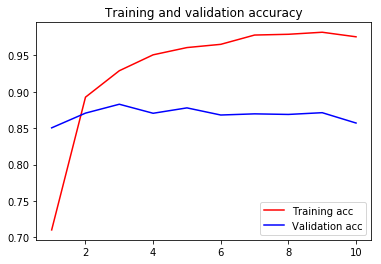

In [ ]:
# Plotting training and validation accuracy against epochs.
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

- We are getting the **best validation accuracy** of **88.28%** in the **3rd epoch** and the model starts overfitting after that.

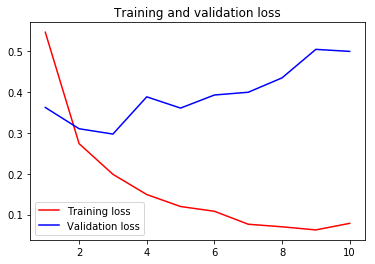

In [ ]:
# Plotting training and validation loss against epochs.
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

- We are getting the **best validation loss** of **0.2970** in the **3rd epoch** and the model starts overfitting after that.

In [ ]:
# Saving model weights
model.save('weights/bidirectional_lstm.h5')

- It **performs slightly better** than the *regular LSTM*, *achieving over **88%** validation accuracy*. 


- It also seems to **overfit more quickly**, which is unsurprising because a *bidirectional layer* has **twice** as many *parameters as* a *chronological LSTM*. 


- With some **regularization**, the *bidirectional approach* would likely be a **strong** performer on this task.


- Now let’s try the same approach with **GRU**.

<a id=section202></a>
### 2.2 Training and Evaluating a Bidirectional GRU

- **Building the model**.

In [ ]:
model = Sequential()
model.add(layers.Embedding(max_features, 32))
model.add(layers.Bidirectional(layers.GRU(32)))
model.add(layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, None, 32)          320000    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 64)                12480     
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 65        
Total params: 332,545
Trainable params: 332,545
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Compiling the model.
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

- **Training the model**.

In [ ]:
history = model.fit(x_train, y_train, epochs=10, batch_size=128, validation_split=0.2)

Train on 20000 samples, validate on 5000 samples
Epoch 1/10
20000/20000 [==============================] - 251s 13ms/sample - loss: 0.5324 - acc: 0.7172 - val_loss: 0.3646 - val_acc: 0.8448
Epoch 2/10
20000/20000 [==============================] - 252s 13ms/sample - loss: 0.2754 - acc: 0.8894 - val_loss: 0.3226 - val_acc: 0.8662
Epoch 3/10
20000/20000 [==============================] - 255s 13ms/sample - loss: 0.2002 - acc: 0.9260 - val_loss: 0.3225 - val_acc: 0.8702
Epoch 4/10
20000/20000 [==============================] - 253s 13ms/sample - loss: 0.1606 - acc: 0.9443 - val_loss: 0.4008 - val_acc: 0.8600
Epoch 5/10
20000/20000 [==============================] - 250s 12ms/sample - loss: 0.1358 - acc: 0.9539 - val_loss: 0.3599 - val_acc: 0.8650
Epoch 6/10
20000/20000 [==============================] - 257s 13ms/sample - loss: 0.1084 - acc: 0.9652 - val_loss: 0.4155 - val_acc: 0.8674
Epoch 7/10
20000/20000 [==============================] - 252s 13ms/sample - loss: 0.0982 - acc: 0.9676 -

**Visualizing Accuracy and Loss against Epochs**

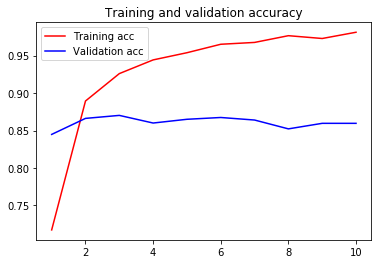

In [ ]:
# Plotting training and validation accuracy against epochs.
acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()

- We are getting the **best validation accuracy** of **87.02%** in the **3rd epoch** and the model starts overfitting after that.

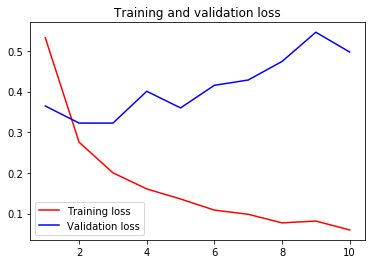

In [ ]:
# Plotting training and validation loss against epochs.
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

- We are getting the **best validation loss** of **0.3225** in the **3rd epoch** and the model starts overfitting after that.

In [ ]:
# Saving model weights
model.save('weights/bidirectional_gru.h5')

<a id=section203></a>
### 2.3 Comparing the Bidirectional LSTM and GRU Models

The two models **perform** in the following way on various **parameters**.

|                                               | **LSTM**                             | **GRU**                              |
|:---------------------------------------------:|:------------------------------------:|:------------------------------------:|
| **Peak Training Accuracy**                    | **98.16%**                           | **98.12%**                           |
| **Peak Validation Accuracy**                  | **88.28%**                           | **87.02%**                           |
| **Least Training Loss**                       | **0.0623**                           | **0.0597**                           |
| **Least Validation Loss**                     | **0.2970**                           | **0.3225**                           |
| **Training Time per Epoch**                   | **307s**                             | **255s**                             |
| **Total Training Time** (for **10 epochs**)   | **3070s (51.16 mins) approx.**       | **2550s (42.5 mins) approx.**        |

**Observations**:

- From the table it can be seen that both these models attain very **similar accuracy scores** for both the training and validation datasets.


- **LSTM** implementation does attain **higher accuracy** than **GRU** (**1.26%** *higher peak validation accuracy*). 
  - For a larger dataset this difference could be larger.


- **LSTM** implementation also attain **lower loss** than **GRU** (**0.0255** *lower validation loss*). 
  - For a larger dataset this difference could be larger.


- **GRU** implementation takes **less training time** than **LSTM** (**520s** i.e **8.66 mins** *faster training*). 
  - For larger datasets the difference in training time might be much higher.

The choice of using **LSTM** or **GRU** layer depends on whether you want to *achieve higher accuracy* or want to *reduce the training time*.

**LSTM layer** probably will always *attain higher accuracy* and **GRU** layer will always be *faster to train*.

<a id=section3></a>
## 3. Going Even Further

There are many other things you could try, in order to **improve performance**:

1. **Adjust** the *number of units in each recurrent layer* in the **stacked** setup. 


2. **Adjust** the *learning rate used by* the **optimizer**.


3. Try **using** *LSTM layers* **instead** of *GRU layers*.


4. **Overfitting** can be avoided using **regularization** methods or *stopping the training after 3 epochs only*.


5. Don’t forget to eventually **run** the *best-performing models* (in terms of validation accuracy) on the **test set**! Otherwise, you’ll *develop architectures* that are *overfitting to* the *validation set*.